In [1]:
## IMPORT MODULES ##

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
## LOAD CSV AS DATAFRAME ##

df = pd.read_csv('../data/iris.csv')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## GET SPECIFIC COLUMNS ##

df_petal = df['petallength']
df_petal

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petallength, Length: 150, dtype: float64

In [4]:
## FILTER COLUMNS BASED ON CONDITIONS ##

df_filtered = df[(df['petallength'] > 3) & (df['sepallength'] > 1)]
df_filtered

,sepallength,sepalwidth,petallength,petalwidth,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
## UNIQUE CLASSES ##

unique_classes = set(df['class'])
print(unique_classes)

{'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'}


<Axes: xlabel='PC1', ylabel='PC2'>

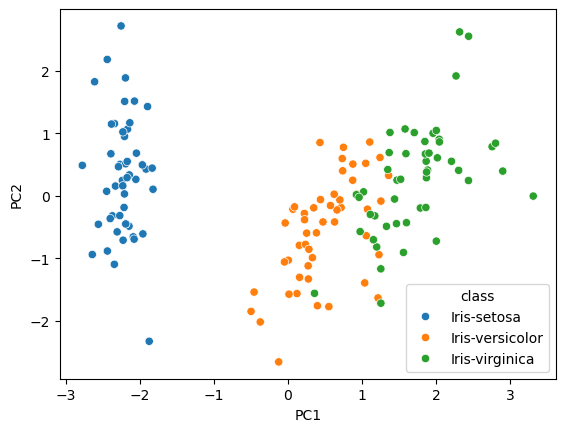

In [6]:
## PCA ##

X = df.drop(['class'],axis=1)
Y = df['class']

z_scaler = StandardScaler()
pca = PCA(n_components=2)

scaled_data = z_scaler.fit_transform(X)
iris_pcs = pca.fit_transform(scaled_data)
df_master = pd.DataFrame(data=iris_pcs,columns=['PC1','PC2'])
df_master['class'] = Y

sns.scatterplot(data=df_master,x='PC1',y='PC2',hue='class',palette='tab10')


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



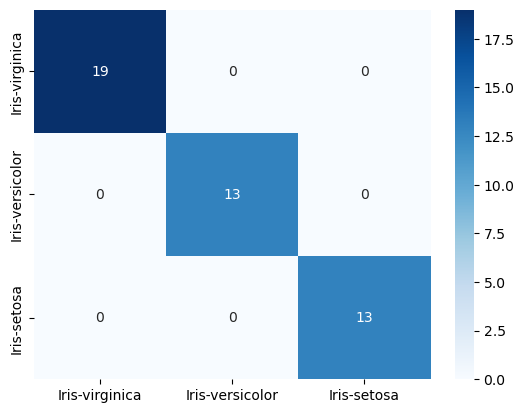

In [7]:
## MACHINE LEARNING ##

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

predictions = rf.predict(x_test)
print(classification_report(y_test,predictions))

cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, fmt='g',annot=True, cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted',labelpad=20)
plt.ylabel('True',labelpad=20)
plt.show()

